In [22]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingRandomSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Separem les dades
dataset = pd.read_csv("../data/datasetFinal.csv", header ='infer', low_memory=False)
y = dataset.MIS_Status
X = dataset.drop(['MIS_Status'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [3]:
x_test

,Unnamed: 0,Term,NoEmp,NewExist,UrbanRural,LowDoc,SBA_Appv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
477078,478754,4,9,2.0,1,0,9.210340,2,3,1,1,0
405351,406903,7,3,1.0,1,0,9.903488,2,4,1,1,0
181398,182450,5,32,1.0,2,0,11.918391,4,4,0,1,1
76473,77183,10,10,1.0,0,0,12.641097,4,4,0,1,1
230557,231750,15,48,1.0,0,0,12.712890,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
522262,524028,10,15,1.0,1,0,12.323856,2,3,0,1,1
10116,10173,7,4,2.0,1,0,8.517193,5,3,0,0,1
433268,434869,14,5,1.0,1,0,12.006401,3,3,0,1,0
53633,54177,4,2,1.0,0,0,11.695247,0,3,0,0,1


In [4]:
criteris = ['gini', 'entropy']
for crit in criteris:
    clf = RandomForestClassifier(criterion=crit, max_depth=10, random_state=30, class_weight="balanced")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(crit)
    print(classification_report(y_test,y_pred))

gini
              precision    recall  f1-score   support

           0       0.60      0.85      0.70     39614
           1       0.96      0.88      0.92    184444

    accuracy                           0.87    224058
   macro avg       0.78      0.86      0.81    224058
weighted avg       0.90      0.87      0.88    224058

entropy
              precision    recall  f1-score   support

           0       0.60      0.85      0.70     39614
           1       0.96      0.88      0.92    184444

    accuracy                           0.87    224058
   macro avg       0.78      0.86      0.81    224058
weighted avg       0.90      0.87      0.88    224058



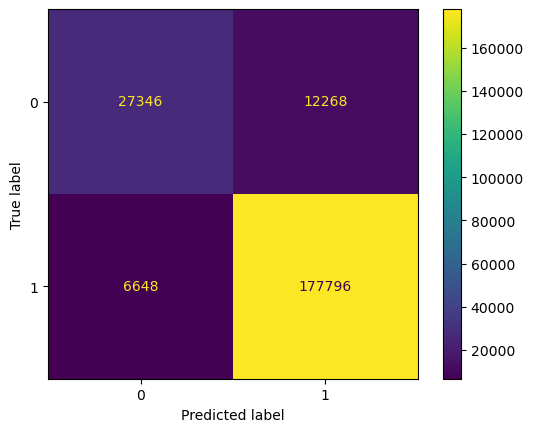

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     39614
           1       0.94      0.96      0.95    184444

    accuracy                           0.92    224058
   macro avg       0.87      0.83      0.85    224058
weighted avg       0.91      0.92      0.91    224058



In [7]:
clf = RandomForestClassifier(criterion="gini", random_state=30, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [8]:
clf2 = LinearSVC(random_state=30, class_weight="balanced")

clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_test)

print(classification_report(y_test,y_pred))

E:\oriol\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.00      0.00     39614
           1       0.82      1.00      0.90    184444

    accuracy                           0.82    224058
   macro avg       0.51      0.50      0.45    224058
weighted avg       0.71      0.82      0.74    224058



In [9]:
#escollim el desicion tree amb gini
clf = RandomForestClassifier(criterion="gini", max_depth=10, random_state=30, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

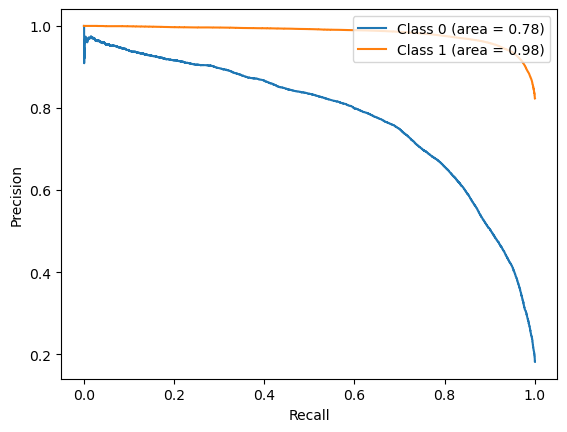

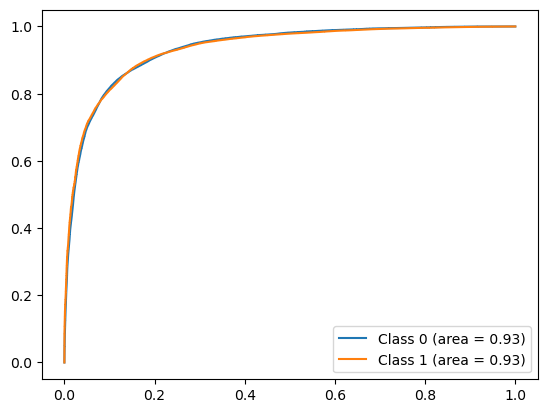

In [10]:
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_proba[:, i])

    plt.plot(recall[i], precision[i],
    label='Class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

E:\oriol\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


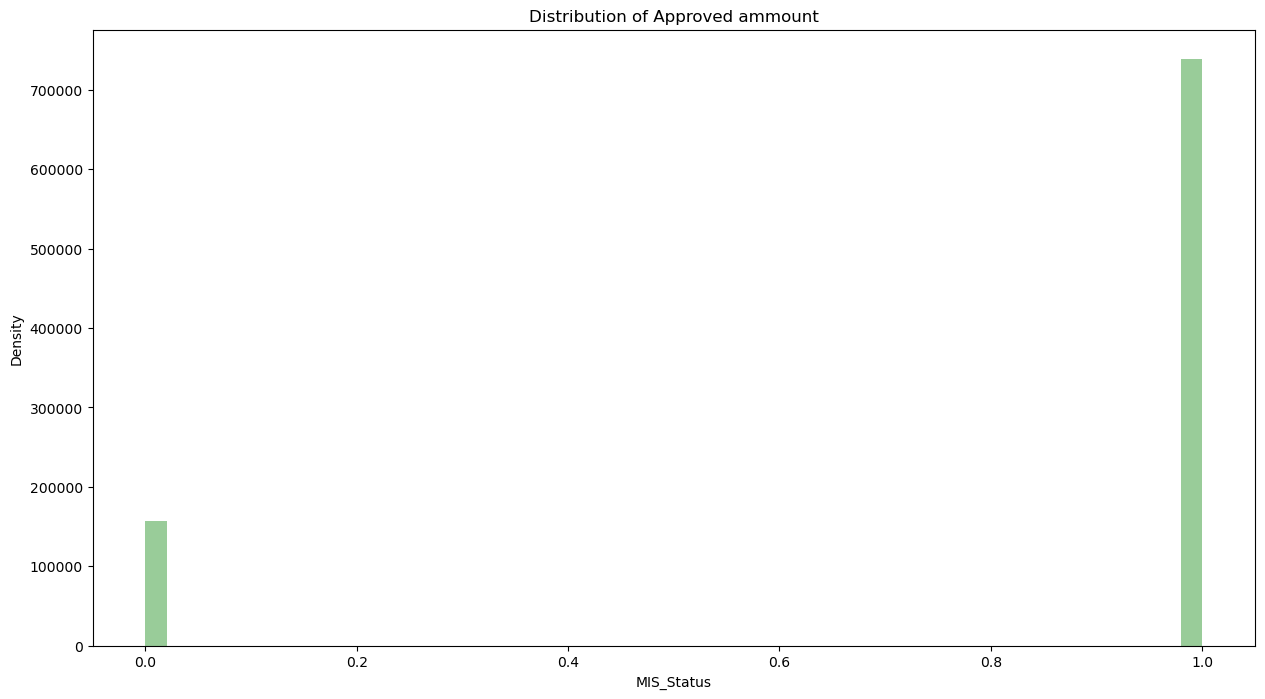

In [14]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['MIS_Status'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

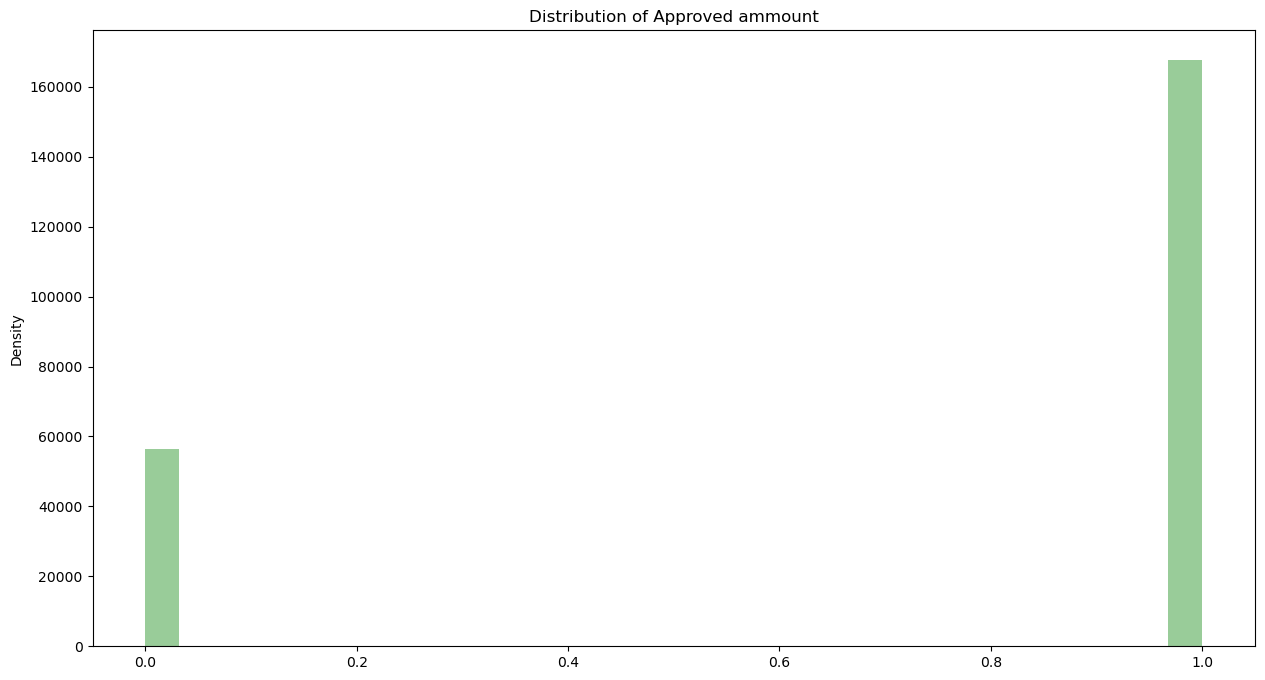

In [15]:
plt.figure(figsize=(15, 8))
sns.distplot(y_pred, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [32]:
pred_percent_0 = len(y_pred[y_pred==0])/len(y_pred)
pred_percent_1 = 1-pred_percent_0
test_percent_0 = len(y_test[y_test==0])/len(y_test)
test_percent_1 = 1 - test_percent_0
print("               0    1")
print("% of predict: ",round(pred_percent_0, 2), round(pred_percent_1, 2))
print("% of test:    ",round(test_percent_0, 2), round(test_percent_1,2))

               0    1
% of predict:  0.25 0.75
% of test:     0.18 0.82
